In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("../input/titanic/train.csv")
test=pd.read_csv("../input/titanic/test.csv")
gender_submission=pd.read_csv("../input/titanic/gender_submission.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print('Shape of Titanic data set is :',df.shape)
print('Size of Titanic data set is  :',df.size)

Shape of Titanic data set is : (891, 12)
Size of Titanic data set is  : 10692


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print(df["Sex"])
print("\n")
df["Sex"]=df["Sex"].replace(["male","female"],[1,0])
print("after replace:")
print(df["Sex"])


test["Sex"]=test["Sex"].replace(["male","female"],[1,0])


0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


after replace:
0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64


In [7]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df=df.dropna(subset=['Embarked'])
test=test.dropna(subset=['Embarked'])

le = preprocessing.LabelEncoder()
df["Embarked"]=le.fit_transform(df["Embarked"])
df["Age"]=imp.fit_transform(df[["Age"]])
test["Embarked"]=le.fit_transform(test["Embarked"])
test["Age"]=imp.fit_transform(test[["Age"]])
test["Fare"]=imp.fit_transform(test[["Fare"]])

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<BarContainer object of 2 artists>

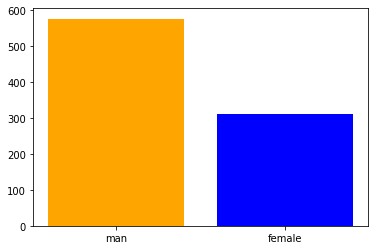

In [9]:
len(df[df["Sex"]==0]["Sex"])

plt.bar(["man","female"],[len(df[df["Sex"]==1]["Sex"]),len(df[df["Sex"]==0]["Sex"])],color=["orange","blue"])

<BarContainer object of 2 artists>

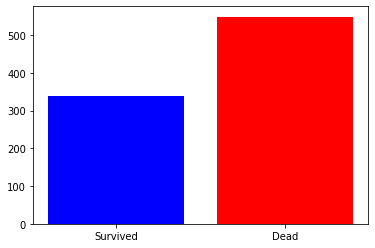

In [10]:
plt.bar(["Survived","Dead"],[len(df[df["Survived"]==1]["Survived"]),len(df[df["Survived"]==0]["Survived"])],color=["blue","red"])

<AxesSubplot:>

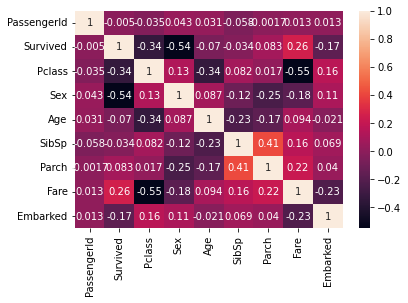

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
def convert_scaler(data):
    scaler=StandardScaler()
    r=scaler.fit(data).transform(data)
    return r
    

In [13]:
df["Fare"]=convert_scaler(df[["Fare"]])
df["Parch"]=convert_scaler(df[["Parch"]])
df["Age"]=convert_scaler(df[["Age"]])
df["Pclass"]=convert_scaler(df[["Pclass"]])
df["SibSp"]=convert_scaler(df[["SibSp"]])

test["Fare"]=convert_scaler(test[["Fare"]])
test["Parch"]=convert_scaler(test[["Parch"]])
test["Age"]=convert_scaler(test[["Age"]])
test["Pclass"]=convert_scaler(test[["Pclass"]])
test["SibSp"]=convert_scaler(test[["SibSp"]])

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,0.825209,"Braund, Mr. Owen Harris",1,-0.563674,0.431350,-0.474326,A/5 21171,-0.500240,NaN,2
1,2,1,-1.572211,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.669217,0.431350,-0.474326,PC 17599,0.788947,C85,0
2,3,1,0.825209,"Heikkinen, Miss. Laina",0,-0.255451,-0.475199,-0.474326,STON/O2. 3101282,-0.486650,NaN,2
3,4,1,-1.572211,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.438050,0.431350,-0.474326,113803,0.422861,C123,2
4,5,0,0.825209,"Allen, Mr. William Henry",1,0.438050,-0.475199,-0.474326,373450,-0.484133,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.373501,"Montvila, Rev. Juozas",1,-0.178396,-0.475199,-0.474326,211536,-0.384475,NaN,2
887,888,1,-1.572211,"Graham, Miss. Margaret Edith",0,-0.794841,-0.475199,-0.474326,112053,-0.042213,B42,2
888,889,0,0.825209,"Johnston, Miss. Catherine Helen ""Carrie""",0,-0.101340,0.431350,2.006119,W./C. 6607,-0.174084,NaN,2
889,890,1,-1.572211,"Behr, Mr. Karl Howell",1,-0.255451,-0.475199,-0.474326,111369,-0.042213,C148,0


Run Model

In [15]:

features=['Survived', 'Pclass','Sex','Age', 'SibSp',
       'Parch', 'Fare','Embarked']
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(df[features[1:]],df[features[0]])
pred=xgb_cl.predict(test[features[1:]])

0.7412140575079874

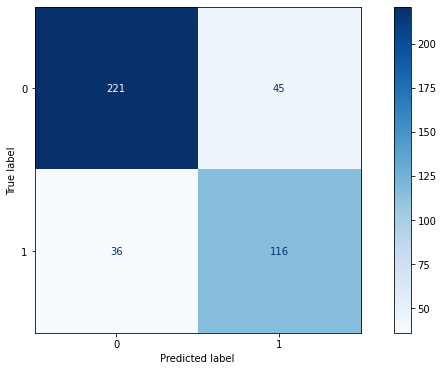

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(gender_submission["Survived"], pred, labels=xgb_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_cl.classes_)
plt.rcParams["figure.figsize"] = (12, 6)
disp.plot(cmap=plt.cm.Blues)
f1_score(gender_submission["Survived"], pred)

In [17]:

SVM = svm.SVC()
SVM.fit(df[features[1:]],df[features[0]])
SVM_pred=SVM.predict(test[features[1:]])

0.9250814332247558

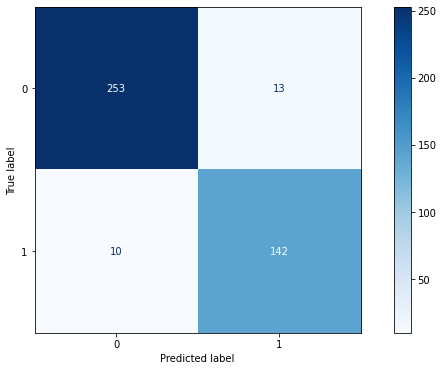

In [18]:
cm = confusion_matrix(gender_submission["Survived"], SVM_pred, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVM.classes_)
plt.rcParams["figure.figsize"] = (12, 6)
disp.plot(cmap=plt.cm.Blues)
f1_score(gender_submission["Survived"], SVM_pred)

In [19]:
RFC = RandomForestClassifier(max_depth=2,random_state=0)
RFC.fit(df[features[1:]],df[features[0]])
RFC_pred=RFC.predict(test[features[1:]])

0.7710843373493976

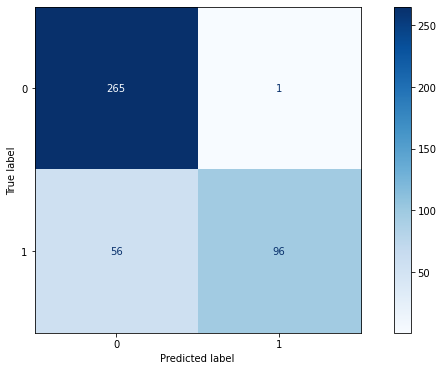

In [20]:
cm = confusion_matrix(gender_submission["Survived"], RFC_pred, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RFC.classes_)
plt.rcParams["figure.figsize"] = (12, 6)
disp.plot(cmap=plt.cm.Blues)
f1_score(gender_submission["Survived"], RFC_pred)